In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heights.csv')

In [7]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


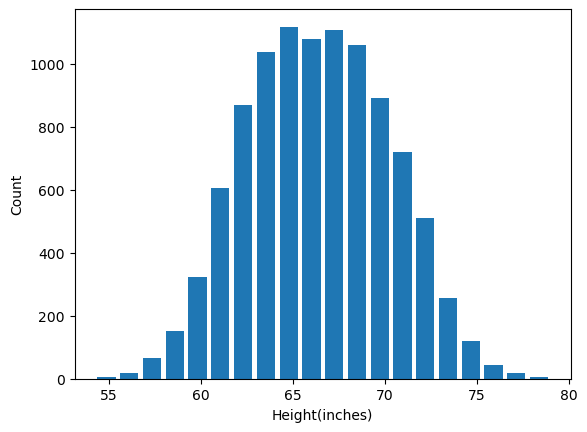

In [15]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [23]:
df.height.min()

54.26313333

In [25]:
df.height.max()

78.99874235

In [27]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


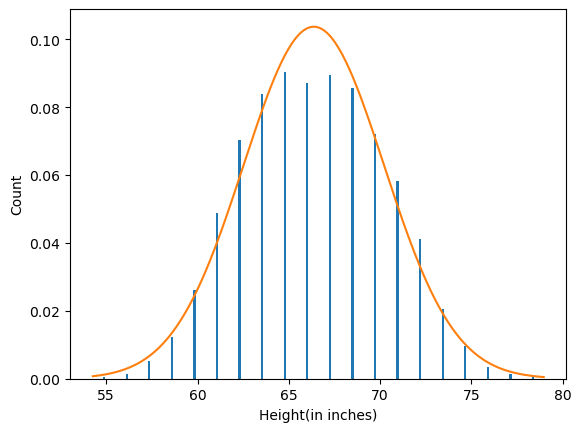

In [29]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height,bins=20,rwidth=0.1,density=True)
plt.xlabel('Height(in inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [31]:
df.height.mean()

66.367559754866

In [33]:
df.height.std()

3.847528120795573

### Outlier detection and removal using 3 standard deviation

In [35]:
upperlimit = df.height.mean() + 3*df.height.std()
upperlimit

77.91014411725271

In [37]:
lowerlimit = df.height.mean() - 3*df.height.std()
lowerlimit

54.824975392479274

In [39]:
df[(df.height>upperlimit) | (df.height<lowerlimit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [43]:
df_new = df[(df.height<upperlimit) & (df.height>lowerlimit)]
df_new

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [45]:
df_new.shape

(9993, 2)

In [47]:
df.shape

(10000, 2)

In [51]:
df.shape[0] - df_new.shape[0]

7

### Calculating Zscore

In [58]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [60]:
(73.84701-66.36755)/3.8475

1.9439792072774535

In [62]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [68]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [70]:
df[(df['zscore']<-3) | (df['zscore']>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [72]:
df_new_zscore = df[(df['zscore']>-3) & (df['zscore']<3)]
df_new_zscore.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [76]:
df.shape[0] - df_new_zscore.shape[0]

7